# INFO-F-422 - Statistical foundations of machine learning Project
#### 2022-2023 

Student 1: MASSA ALSAFADI MAHMALJI

Student 2: Oussama Mifdal

**Video link 1 :**  https://universitelibrebruxelles.sharepoint.com/sites/GRP_ml831/_layouts/15/stream.aspx?id=%2Fsites%2FGRP%5Fml831%2FDocuments%20partages%2FGeneral%2FRecordings%2FAffichage%20seul%2FNouvelle%20r%C3%A9union%20de%20canal%2D20230519%5F215831%2DEnregistrement%20de%20la%20r%C3%A9union%2Emp4

**Video link 2 :** https://drive.google.com/file/d/1Q8QyNnpcgWY-5rTBQG9ZR0co8vRPzH8x/view?usp=share_link


**Important Notes:**

1. We saved the models after training them because they took too long (30 minutes each)to train so you can load them instead of letting them run again.

2. all the models are uploaded to git except for xgboost, it was very big

3. while running this notebook on colab, read.table at the beginning sometimes gives wrong dimensions. Please make sure you have 260601,39 as dimension of the data.

# Introduction

In this project we are going to do data exploration and 


predict the level of damage to buildings caused by the 2015 Gorkha earthquake in Nepal. We will use supervised learning models and feature selection techniques for this classification problem.

There are 39 features in this data related to goegraphical and building characteristics and 1 label (damage_grade) that will be predicted, which represents a level of damage to the building that was hit by the earthquake. There are 3 grades of the damage:



1.   represents low damage
2.   represents a medium amount of damage
3.   represents almost complete destruction










#Task 1 : Data Preprocessing

We will start to explore the training data which is divided to values (features) and labels(damage_grade)

In [189]:
# read the data without the labels from csv
set.seed(2)
train_values<-read.table("train_values.csv",sep=',',header= T)
head(train_values)

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,⋯,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,802906,6,487,12198,2,30,6,5,t,r,⋯,0,0,0,0,0,0,0,0,0,0
2,28830,8,900,2812,2,10,8,7,o,r,⋯,0,0,0,0,0,0,0,0,0,0
3,94947,21,363,8973,2,10,5,5,t,r,⋯,0,0,0,0,0,0,0,0,0,0
4,590882,22,418,10694,2,10,6,5,t,r,⋯,0,0,0,0,0,0,0,0,0,0
5,201944,11,131,1488,3,30,8,9,t,r,⋯,0,0,0,0,0,0,0,0,0,0
6,333020,8,558,6089,2,10,9,5,t,r,⋯,1,0,0,0,0,0,0,0,0,0


In [190]:
# checking the dimension 
dim(train_values)

[1] 260601     39

So we have 39 features and 260601 data observations

In [191]:
# reading the labels from csv file
set.seed(2)
train_labels<-read.table("train_labels.csv",sep=',',header=T)
# 
head(train_labels)

,building_id,damage_grade
,<int>,<int>
1,802906,3
2,28830,2
3,94947,3
4,590882,2
5,201944,3
6,333020,2


It is seen that the labels data is linked to the building id which is the unique value

In [195]:
dim(train_labels)

[1] 260601      2

In [196]:
# Merge data frames together to have one training dataset
train_data <- merge(x = train_values, y = train_labels, by = "building_id")
head(train_data)

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,⋯,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,4,30,266,1224,1,25,5,2,t,r,⋯,0,0,0,0,0,0,0,0,0,2
2,8,17,409,12182,2,0,13,7,t,r,⋯,0,0,0,0,0,0,0,0,0,3
3,12,17,716,7056,2,5,12,6,o,r,⋯,0,0,0,0,0,0,0,0,0,3
4,16,4,651,105,2,80,5,4,n,r,⋯,0,0,0,0,0,0,0,0,0,2
5,17,3,1387,3909,5,40,5,10,t,r,⋯,0,0,0,0,0,0,0,0,0,2
6,25,26,1132,6645,2,0,6,6,t,w,⋯,0,0,0,0,0,0,0,0,0,1


In [197]:
dim(train_data)

[1] 260601     40

In [198]:
#checking the summary for the data 
summary(train_data)

  building_id      geo_level_1_id geo_level_2_id   geo_level_3_id 
 Min.   :      4   Min.   : 0.0   Min.   :   0.0   Min.   :    0  
 1st Qu.: 261190   1st Qu.: 7.0   1st Qu.: 350.0   1st Qu.: 3073  
 Median : 525757   Median :12.0   Median : 702.0   Median : 6270  
 Mean   : 525676   Mean   :13.9   Mean   : 701.1   Mean   : 6258  
 3rd Qu.: 789762   3rd Qu.:21.0   3rd Qu.:1050.0   3rd Qu.: 9412  
 Max.   :1052934   Max.   :30.0   Max.   :1427.0   Max.   :12567  
 count_floors_pre_eq      age         area_percentage   height_percentage
 Min.   :1.00        Min.   :  0.00   Min.   :  1.000   Min.   : 2.000   
 1st Qu.:2.00        1st Qu.: 10.00   1st Qu.:  5.000   1st Qu.: 4.000   
 Median :2.00        Median : 15.00   Median :  7.000   Median : 5.000   
 Mean   :2.13        Mean   : 26.54   Mean   :  8.018   Mean   : 5.434   
 3rd Qu.:2.00        3rd Qu.: 30.00   3rd Qu.:  9.000   3rd Qu.: 6.000   
 Max.   :9.00        Max.   :995.00   Max.   :100.000   Max.   :32.000   
 land_surface

## 1. Removing features with data type 'character'




In [199]:
# checking the data types for each feature
sapply(train_data[1,],class)

building_id                         geo_level_1_id 
                             "integer"                              "integer" 
                        geo_level_2_id                         geo_level_3_id 
                             "integer"                              "integer" 
                   count_floors_pre_eq                                    age 
                             "integer"                              "integer" 
                       area_percentage                      height_percentage 
                             "integer"                              "integer" 
                land_surface_condition                        foundation_type 
                           "character"                            "character" 
                             roof_type                      ground_floor_type 
                           "character"                            "character" 
                      other_floor_type                               position 
                           "character"                            "character" 
                    plan_configuration           has_superstructure_adobe_mud 
                           "character"                              "integer" 
   has_superstructure_mud_mortar_stone          has_superstructure_stone_flag 
                             "integer"                              "integer" 
has_superstructure_cement_mortar_stone    has_superstructure_mud_mortar_brick 
                             "integer"                              "integer" 
has_superstructure_cement_mortar_brick              has_superstructure_timber 
                             "integer"                              "integer" 
             has_superstructure_bamboo   has_superstructure_rc_non_engineered 
                             "integer"                              "integer" 
      has_superstructure_rc_engineered               has_superstructure_other 
                             "integer"                              "integer" 
                legal_ownership_status                         count_families 
                           "character"                              "integer" 
                     has_secondary_use          has_secondary_use_agriculture 
                             "integer"                              "integer" 
               has_secondary_use_hotel               has_secondary_use_rental 
                             "integer"                              "integer" 
         has_secondary_use_institution               has_secondary_use_school 
                             "integer"                              "integer" 
            has_secondary_use_industry          has_secondary_use_health_post 
                             "integer"                              "integer" 
          has_secondary_use_gov_office           has_secondary_use_use_police 
                             "integer"                              "integer" 
               has_secondary_use_other                           damage_grade 
                             "integer"                              "integer"

In [200]:
# checking which features contain charachters
character_variables<-which(sapply(train_data[1,],class)=="character")
character_variables

land_surface_condition        foundation_type              roof_type 
                     9                     10                     11 
     ground_floor_type       other_floor_type               position 
                    12                     13                     14 
    plan_configuration legal_ownership_status 
                    15                     27

Although we have 39 features we can check the charachter features to select them and encode their values but we have so many characters and we don't want to add many features otherwise we want to remove them. 

In [201]:
# removing the char features 
new_data<-train_data[,-character_variables]

we can see that we have 8 features that contain characters so we may remove them because they can not be fed to a learning model

## 2. Labels distribution

this is to see the distribution of the 3 classes and their number

In [77]:
###################### create a balanced dataset (downsampling)
with(new_data, {print(table(damage_grade));})

damage_grade
     1      2      3 
 25124 148259  87218 


there are around 10% of data for grade 1 , 57% for grade 2 and 33% for grade 3 so we see ab really unbalanced data here therefore we will implement downsampling to the data to make it balanced.

In [202]:
# making all lables numbers to be equal to 25124 with the grade with the least number
x1= which(new_data$damage_grade==2)
x2= which(new_data$damage_grade==1)
x3=which(new_data$damage_grade==3)
r=sample(x1,length(x2))
r1=sample(x3,length(x2))
down_data=new_data[c(x2,r,r1),]

In [203]:
with(down_data, {print(table(damage_grade));})

damage_grade
    1     2     3 
25124 25124 25124 


In [204]:
# this is the new shape of the data
dim(down_data)

[1] 75372    32

## 3. Data visualization

[1] 2

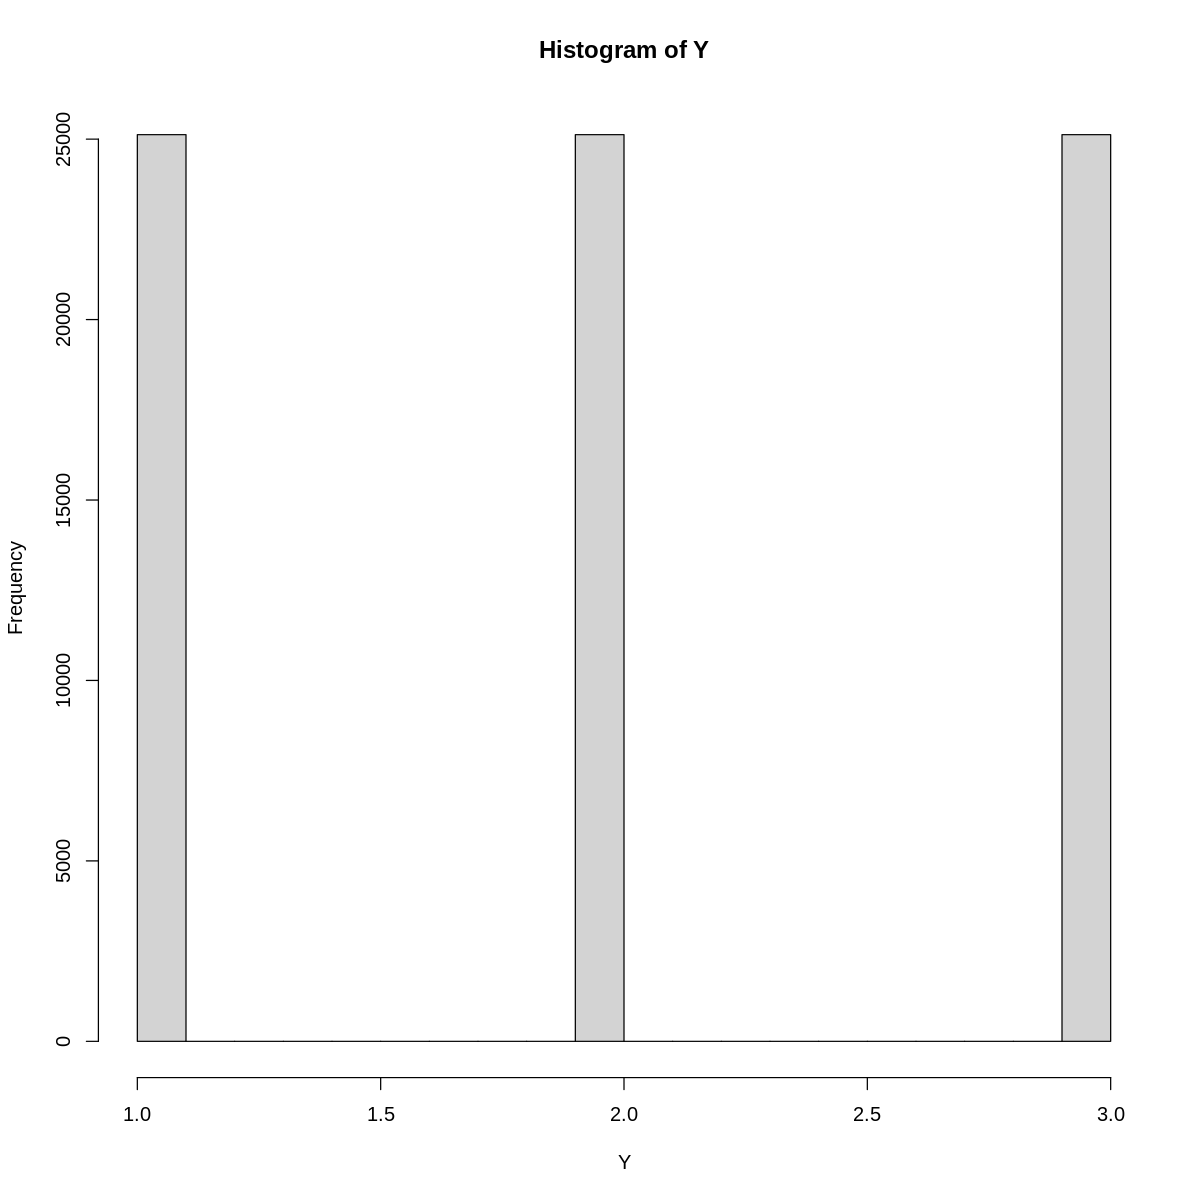

[1] 2.238272

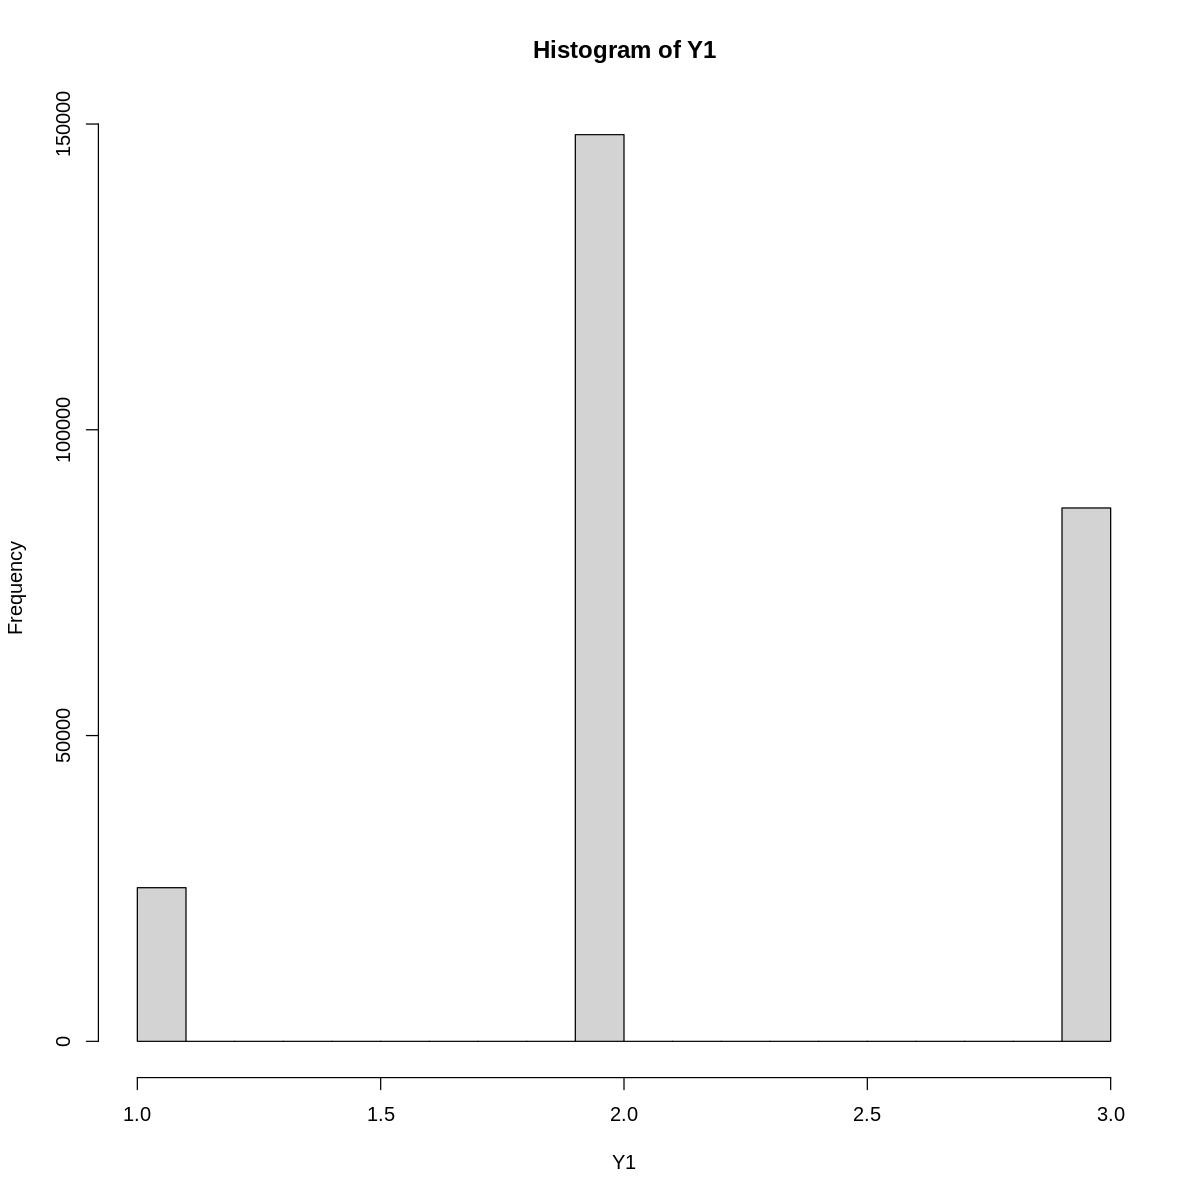

In [205]:
options(repr.plot.width=10, repr.plot.height=10)
set.seed(3)
# plotting the balanced data
X<- down_data[,setdiff(colnames(down_data),"damage_grade")]
Y<-down_data[,"damage_grade"]
#  plotting the unbalanced data
X1<-new_data[,setdiff(colnames(new_data),"damage_grade")]
Y1<-new_data[,"damage_grade"]

N<-nrow(X)    #Number of examples
n<-ncol(X)
hist(Y) 
mean(Y)

N<-nrow(X1)    #Number of examples
n<-ncol(X1)
hist(Y1) 
mean(Y1)

 ## 4. Missing values

In [206]:
# summing the missing values nans in each column in the dataset
sum(is.na(new_data$col))

[1] 0

In [207]:
which(is.na(new_data))

integer(0)

We don't have any missing values in the dataset

***After many trials of ML models we found that accuracy is better when we take the unbalanced data bacause it has more data to train!***

In [208]:
data<-new_data
dim(data)

[1] 260601     32

##5.Feature selection

The data in our hands contains 32 features which is still a big number according to an ordinary dataset. To avoid long learning time and complexity of the model, dimension reduction and removing irrelevant features are needed.It enhances the performance of the model and decrease the chance of overfitting
Feature selection and ensembles of models are two techniques which can be used to improve the accuracy of preditions. 




##mRMR

MRMR (Maximum Relevance Minimum Redundancy) is a technique used for feature selection filter method that selects the most correlated feature to the output and by also minimizing the redundancy of the features. This is how it is done:

1. find relevance for each feature with respect to the target by calculating the mutual information so we know the amount of information each feature has.
2. find redundancy also using mutual information by observing overlap of information between features.
3.  initialize an empty set of selected features.
4. find the the feature with highest relevance score and add to the selected features.
5. calculate reducndancy between the selected and the remained features
6. Calculate MRMR Score by taking the  difference between the relevance and redundancy scores.
7. Choose the feature with the highest MRMR score and add it to the selected feature set.

The mutual information can be calculated as 

\begin{equation*}
I(X; Y) = -\frac{1}{2}\log(1-\rho^2)
\end{equation*}

while $rho$ is correlation between x and y.

This method is considered to be really effective because it can see insights and give informative values from the relation between our features that are describing building and land characteristics. And those are related to what damage an earthquake can cause. We preferred MRMR so we can see both relevant features such as materials used in the building and geographical features and redundant ones like some materials are similar to each other. Then it takes a tradeoff between them.










In [209]:
# assigning  features to a variable and the labels to another
X<-data[,setdiff(colnames(data),"damage_grade")]
Y<-data[,"damage_grade"]

N<-nrow(X) # number of observations
n<-ncol(X) # number of features 

# drop = F is used to preserve the structure of the data as data.frame (see https://www.r-bloggers.com/2018/02/r-tip-use-drop-false-with-data-frames/)
set.seed(123)
#we have 10 folds to iterate 
CV_folds <- 10 
# size of the fold
size_CV <-floor(N/CV_folds)
#initialize the error matrix
CV_err<-matrix(0,nrow=n,ncol=CV_folds)

for (i in 1:CV_folds) {
    
    idx_ts<-(((i-1)*size_CV+1):(i*size_CV))  ### idx_ts represents the indices of the test set the i-th fold
    X_ts<-X[idx_ts,]  
    Y_ts<-Y[idx_ts]  
     
    idx_tr<-setdiff(1:N,idx_ts) ### idx_tr represents  indices of the training set for the i-th fold
    X_tr<-X[idx_tr,]
    Y_tr<-Y[idx_tr]                          
    
    # Computing the mutual_info between input variables and output variable on the training set
    mutual_info <- -0.5 * log(1 - cor(X_tr,Y_tr)^2)
    
    # Initialization : No variables are selected and all the variables are candidates
    selected<-c()
    #candidates has the number of features
    candidates<-1:n
    
    #mRMR ranks the variables by taking account not only the mutual_info with the output, but also by avoiding redudant variables
    for (j in 1:n) {
      #intialize the redundancy_score vector
        redundancy_score<-numeric(length(candidates))
        
        if (length(selected)>0) {
            # Compute the mutual_info between the selected variables and the candidates on the training set
            mutual_info_selected_candidates <- -0.5 * log(1 - cor(X_tr[,selected,drop=F],X_tr[,candidates,drop=F])^2)
            # Compute the mean mutual_info for each candidate variable, across the selected variables
            redundancy_score<-apply(mutual_info_selected_candidates,2,mean)
        }
        
        # mRMR: minimum Redundancy Maximum Relevancy
        mRMR_score<-mutual_info[candidates]-redundancy_score
        
        # Select the candidate variable that maximises the mRMR score
        selected_current<-candidates[which.max(mRMR_score)]
        selected<-c(selected,selected_current)
        
        # Remove the selected variables from the candidates
        candidates<-setdiff(candidates,selected_current)
    }
    
    ranking <- selected
     
    for (nb_features in 1:n) {
        # Create a dataset including only the first nb_features selected variables
        DS<-cbind(X_tr[,ranking[1:nb_features],drop=F],imdb_score=Y_tr)
        
        # Model fit (using lm function)
        model<- lm(imdb_score~.,DS)
        
        # Model prediction
        Y_hat_ts<- predict(model,X_ts[,ranking[1:nb_features],drop=F])
        
        # Cross-validation error = MSE
        CV_err[nb_features,i]<-mean((Y_hat_ts-Y_ts)^2)
    }
}  

print(paste("#Features: ",selected," ; CV error=",round(apply(CV_err,1,mean),digits=4), " ; std dev=",round(apply(CV_err,1,sd),digits=4)))

 [1] "#Features:  10  ; CV error= 0.3426  ; std dev= 0.0026"
 [2] "#Features:  5  ; CV error= 0.3362  ; std dev= 0.0025" 
 [3] "#Features:  18  ; CV error= 0.3306  ; std dev= 0.003" 
 [4] "#Features:  17  ; CV error= 0.3265  ; std dev= 0.0031"
 [5] "#Features:  11  ; CV error= 0.3243  ; std dev= 0.0031"
 [6] "#Features:  14  ; CV error= 0.32  ; std dev= 0.0027"  
 [7] "#Features:  20  ; CV error= 0.3194  ; std dev= 0.0026"
 [8] "#Features:  16  ; CV error= 0.3181  ; std dev= 0.0027"
 [9] "#Features:  21  ; CV error= 0.3177  ; std dev= 0.0026"
[10] "#Features:  12  ; CV error= 0.3175  ; std dev= 0.0027"
[11] "#Features:  1  ; CV error= 0.3175  ; std dev= 0.0027" 
[12] "#Features:  3  ; CV error= 0.3175  ; std dev= 0.0027" 
[13] "#Features:  2  ; CV error= 0.3175  ; std dev= 0.0027" 
[14] "#Features:  6  ; CV error= 0.3174  ; std dev= 0.0027" 
[15] "#Features:  4  ; CV error= 0.3174  ; std dev= 0.0027" 
[16] "#Features:  7  ; CV error= 0.3172  ; std dev= 0.0026" 
[17] "#Features:  30  ; 

Here we  used linear model as a learner because it is faster. We also used another such as decision tree but we got the same result of selected features.

we can see that the CV error almost stops decreasing at the 20th feature, so we suggest to use in our models 20 features. We already tried to take only 10 features but the F1 score was not that good around 0.5 and 0.6.

In [210]:
selected
colnames(X)[selected]

[1] 10  5 18 17 11 14 20 16 21 12  1  3  2  6  4  7 30 29 28 24 25 19 26 27 31
[26]  9 15 23 13 22  8

[1] "has_superstructure_mud_mortar_stone"   
 [2] "count_floors_pre_eq"                   
 [3] "has_superstructure_rc_engineered"      
 [4] "has_superstructure_rc_non_engineered"  
 [5] "has_superstructure_stone_flag"         
 [6] "has_superstructure_cement_mortar_brick"
 [7] "count_families"                        
 [8] "has_superstructure_bamboo"             
 [9] "has_secondary_use"                     
[10] "has_superstructure_cement_mortar_stone"
[11] "building_id"                           
[12] "geo_level_2_id"                        
[13] "geo_level_1_id"                        
[14] "age"                                   
[15] "geo_level_3_id"                        
[16] "area_percentage"                       
[17] "has_secondary_use_use_police"          
[18] "has_secondary_use_gov_office"          
[19] "has_secondary_use_health_post"         
[20] "has_secondary_use_rental"              
[21] "has_secondary_use_institution"         
[22] "has_superstructure_other"              
[23] "has_secondary_use_school"              
[24] "has_secondary_use_industry"            
[25] "has_secondary_use_other"               
[26] "has_superstructure_adobe_mud"          
[27] "has_superstructure_timber"             
[28] "has_secondary_use_hotel"               
[29] "has_superstructure_mud_mortar_brick"   
[30] "has_secondary_use_agriculture"         
[31] "height_percentage"

In [211]:
#taking the top 20 features
top_20_features <- ranking[1:20]
top_20_features

[1] 10  5 18 17 11 14 20 16 21 12  1  3  2  6  4  7 30 29 28 24

In [212]:
top_20_features_names<-colnames(X)[top_20_features]
top_20_features_names

[1] "has_superstructure_mud_mortar_stone"   
 [2] "count_floors_pre_eq"                   
 [3] "has_superstructure_rc_engineered"      
 [4] "has_superstructure_rc_non_engineered"  
 [5] "has_superstructure_stone_flag"         
 [6] "has_superstructure_cement_mortar_brick"
 [7] "count_families"                        
 [8] "has_superstructure_bamboo"             
 [9] "has_secondary_use"                     
[10] "has_superstructure_cement_mortar_stone"
[11] "building_id"                           
[12] "geo_level_2_id"                        
[13] "geo_level_1_id"                        
[14] "age"                                   
[15] "geo_level_3_id"                        
[16] "area_percentage"                       
[17] "has_secondary_use_use_police"          
[18] "has_secondary_use_gov_office"          
[19] "has_secondary_use_health_post"         
[20] "has_secondary_use_rental"

It is clear that if the superstructure was made of Mud Mortar - Stone, numbers of floors and if the superstructure is made of flag stone are the most correlated features that describe well the damage grade of the building.

In [213]:
#taking the data with only those 20 features
final_data<-data[,c(top_20_features_names,'damage_grade')]
dim(final_data)

[1] 260601     21

# Task 2: Model Selection

### Supervised learning

In our project we will use supervised learning models because we already have the labels (damage grade). A model's goal is to find a relationship between inputs and outputs. Our model can be represented as 


\begin{equation*}
 damagegr= f(\mathbf{features})  
\end{equation*}

where:
- $damagegr$ is the damage grade class 
- $\mathbf{features}$ represents the vector of features.
- $f$ is mapping between features and damage grade .

In this project we have to find the best model that fits the data and gives the best prediction after training the features. 
## Classification 

ML problems can be a classification or a regression problems. Our problem is to estimate the damage grade among 1,2 and 3 so $k=3$  rather than continueus value, therefore we will consider calssification in this project. We will find the best technique to allow features to learn the mapping to classify what damage grade will predict.

##Performance Metric

As long as we have 3 classes the normal F1 score won't work with us because our problem is not binary calssification. Therefore micro averaged F1 score is used instead which balances the recall and precision. It is defined as below and its value must be between 0 and 1 while 1 refers to the best model.



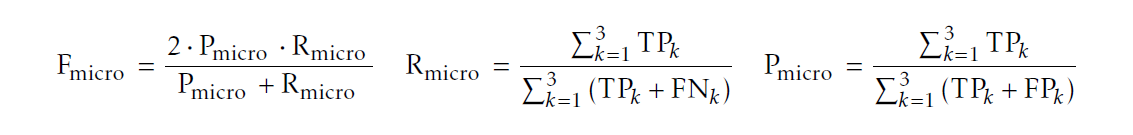

The code below is function took from **MLmetrics package** because we couldn't run without it!



In [214]:
ConfusionMatrix <- function(y_pred, y_true) {
  Confusion_Mat <- table(y_true, y_pred)
  return(Confusion_Mat)
}
 
ConfusionDF <- function(y_pred, y_true) {
  Confusion_DF <- transform(as.data.frame(ConfusionMatrix(y_pred, y_true)),
                            y_true = as.character(y_true),
                            y_pred = as.character(y_pred),
                            Freq = as.integer(Freq))
  return(Confusion_DF)
}
 
Precision_micro <- function(y_true, y_pred, labels = NULL) {
  Confusion_DF <- ConfusionDF(y_pred, y_true)
 
  if (is.null(labels) == TRUE) labels <- unique(c(y_true, y_pred))
  # this is not bulletproof since there might be labels missing (in strange cases)
  # in strange cases where they existed in training set but are missing from test ground truth and predictions.
 
  TP <- c()
  FP <- c()
  for (i in c(1:length(labels))) {
    positive <- labels[i]
   
    # it may happen that a label is never predicted (missing from y_pred) but exists in y_true
    # in this case ConfusionDF will not have these lines and thus the simplified code crashes
    # TP[i] <- as.integer(Confusion_DF[which(Confusion_DF$y_true==positive & Confusion_DF$y_pred==positive), "Freq"])
    # FP[i] <- as.integer(sum(Confusion_DF[which(Confusion_DF$y_true!=positive & Confusion_DF$y_pred==positive), "Freq"]))
   
    # workaround:
    # i don't want to change ConfusionDF since i don't know if the current behaviour is a feature or a bug.
    tmp <- Confusion_DF[which(Confusion_DF$y_true==positive & Confusion_DF$y_pred==positive), "Freq"]
    TP[i] <- if (length(tmp)==0) 0 else as.integer(tmp)
   
    tmp <- Confusion_DF[which(Confusion_DF$y_true!=positive & Confusion_DF$y_pred==positive), "Freq"]
    FP[i] <- if (length(tmp)==0) 0 else as.integer(sum(tmp))
  }
  Precision_micro <- sum(TP) / (sum(TP) + sum(FP))
  return(Precision_micro)
}
 
Recall_micro <- function(y_true, y_pred, labels = NULL) {
  Confusion_DF <- ConfusionDF(y_pred, y_true)
 
  if (is.null(labels) == TRUE) labels <- unique(c(y_true, y_pred))
  # this is not bulletproof since there might be labels missing (in strange cases)
  # in strange cases where they existed in training set but are missing from test ground truth and predictions.
 
  TP <- c()
  FN <- c()
  for (i in c(1:length(labels))) {
    positive <- labels[i]
   
    # short version, comment out due to bug or feature of Confusion_DF
    # TP[i] <- as.integer(Confusion_DF[which(Confusion_DF$y_true==positive & Confusion_DF$y_pred==positive), "Freq"])
    # FP[i] <- as.integer(sum(Confusion_DF[which(Confusion_DF$y_true==positive & Confusion_DF$y_pred!=positive), "Freq"]))
   
    # workaround:
    tmp <- Confusion_DF[which(Confusion_DF$y_true==positive & Confusion_DF$y_pred==positive), "Freq"]
    TP[i] <- if (length(tmp)==0) 0 else as.integer(tmp)
 
    tmp <- Confusion_DF[which(Confusion_DF$y_true==positive & Confusion_DF$y_pred!=positive), "Freq"]
    FN[i] <- if (length(tmp)==0) 0 else as.integer(sum(tmp))
  }
  Recall_micro <- sum(TP) / (sum(TP) + sum(FN))
  return(Recall_micro)
}
 
F1_Score_micro <- function(y_true, y_pred, labels = NULL) {
  if (is.null(labels) == TRUE) labels <- unique(c(y_true, y_pred)) # possible problems if labels are missing from y_*
  Precision <- Precision_micro(y_true, y_pred, labels)
  Recall <- Recall_micro(y_true, y_pred, labels)
  F1_Score_micro <- 2 * (Precision * Recall) / (Precision + Recall)
  return(F1_Score_micro)
}

## 1.Decision Tree



The working mechanism of decision trees starts by taking the training dataset and splitting it
into smaller subsets to make simple models for each one. Each feature in this subset is
checked whether it has the most informative contribution or not and depending on the
result it will be chosen to be the root node. Then, a condition is asked, if the answer is yes
or no the tree will be split into one of the branches to construct a subtree with decision
nodes. By asking binary questions about a single feature, a branch is chosen in a greedy
way by not looking forward and just taking the best split in the following branch. In the
end, a leaf node is reached that is the final predicted output. These procedures are repeated
for each subset by using recursive partition. In other words, instead of applying a linear
model to the whole dataset, nonlinear simple models, with more than one attribute for
smaller sets, are applied to make it much easier to deal with. Furthermore, each leaf node
 is associated to a specific output label $C_i$. 

This process can be done by two main steps which are tree growing to find the correct split than minimise the cost function and tree pruning to cut some branches to avoid overfitting.

In our model we will define 10 cross validation folds, train and test some data using rpart from rpart package






In [34]:
# installing packages
install.packages("rpart")
library("rpart")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [215]:
data<-final_data

In [216]:
set.seed(123)
k = 10
#index of the damage_grade
target_variable <- ncol(data)

#initialize F1 micro score vector
F1<- array(0,k)


#  Shuffle the dataset randomly.
idx <- sample(1:nrow(data))

#  Split the dataset into k folds
max <- ceiling(nrow(data)/k)
splits <- split(idx, ceiling(seq_along(idx)/max))

# For each unique group:
for (i in 1:k){
    # Take the group as a hold out or test data set
    test_data <- data[splits[[i]],]
    
    #Take the remaining groups as a training data set
    train_data <- data[-splits[[i]],]
    
    
    #train a model on the training set and evaluate it on the test set
    # use rpart (classification tree)
    tree_model <- rpart(damage_grade ~ ., method="class",data=train_data)
    pred <- predict(tree_model,test_data[,-target_variable])
    # it returns the index of the first occurrence of the maximum value so that 
    # it refers to the right class
    Y_pred<- max.col(pred)
    Y <- test_data[,target_variable]
  
    # Retain the F1 score and discard the model
    F1[i]=F1_Score_micro(Y_pred, Y)
    print(paste("[INFO] - F1_score_micro -",i,"fold:",F1[i]))
}   

# Summarize the skill of the model using the sample of model F1 scores
print(paste("[INFO] - Mean F1:",mean(F1)))


[1] "[INFO] - F1_score_micro - 1 fold: 0.63877057672384"
[1] "[INFO] - F1_score_micro - 2 fold: 0.635739227197728"
[1] "[INFO] - F1_score_micro - 3 fold: 0.645830935113772"
[1] "[INFO] - F1_score_micro - 4 fold: 0.639729864548559"
[1] "[INFO] - F1_score_micro - 5 fold: 0.634971796937953"
[1] "[INFO] - F1_score_micro - 6 fold: 0.637465945282222"
[1] "[INFO] - F1_score_micro - 7 fold: 0.646061164191704"
[1] "[INFO] - F1_score_micro - 8 fold: 0.638578719158896"
[1] "[INFO] - F1_score_micro - 9 fold: 0.636698515022447"
[1] "[INFO] - F1_score_micro - 10 fold: 0.644518654997697"
[1] "[INFO] - Mean F1: 0.639836539917482"


it is seen that the F1 micro score is almost 0.64 which is average score

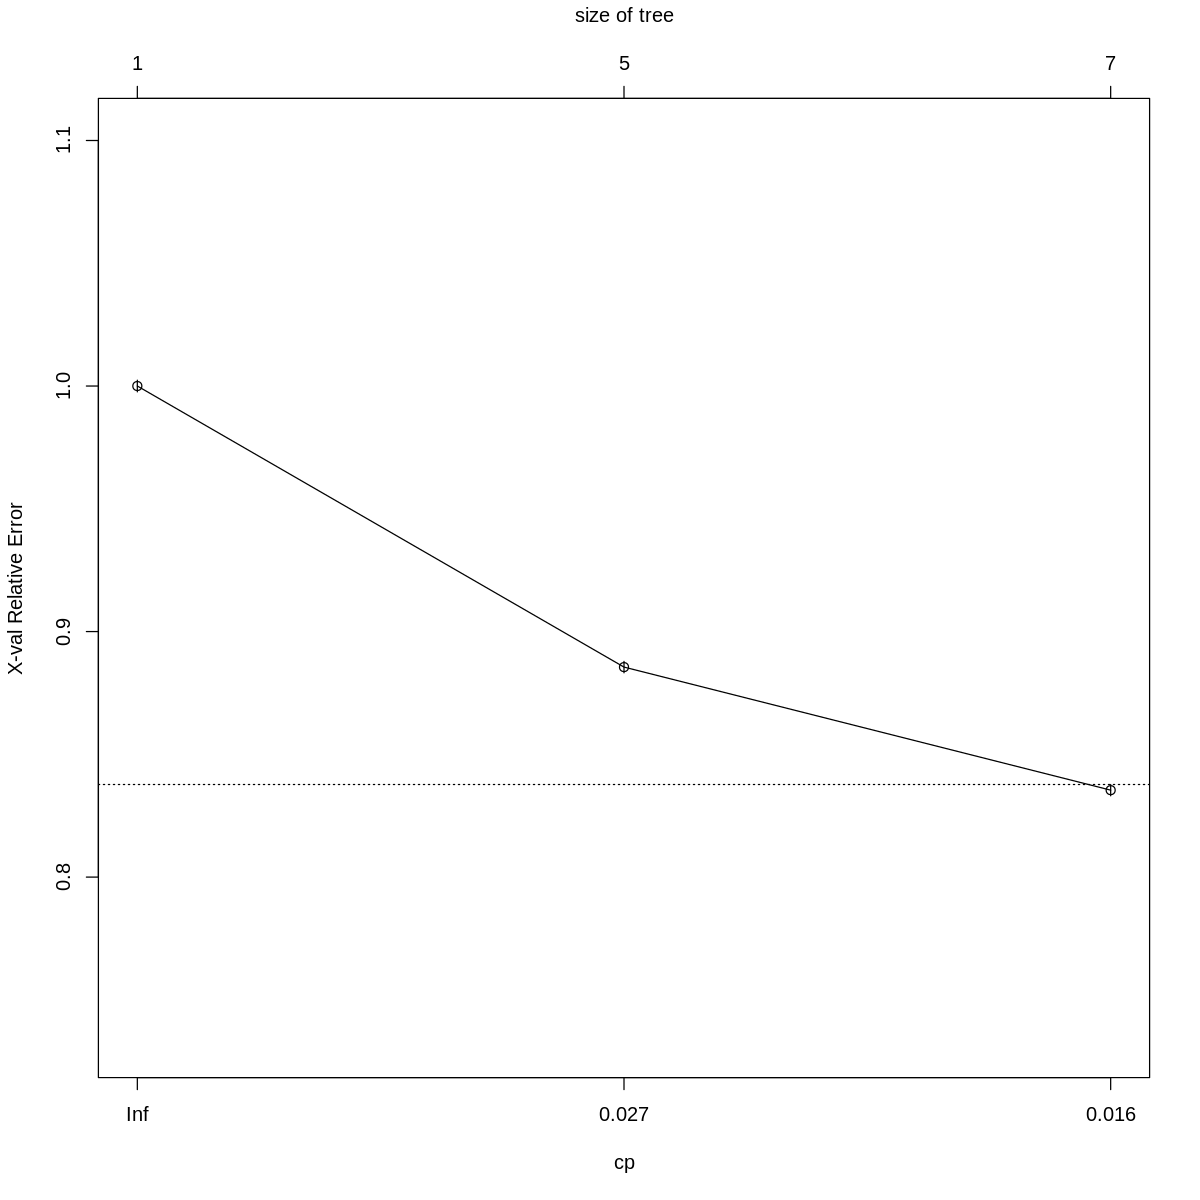

In [218]:
plotcp(tree_model) # visualize cross-validation results


In [220]:
data.frame(tree_model$variable.importance)

,tree_model.variable.importance
,<dbl>
geo_level_1_id,1.256776e+04
has_superstructure_mud_mortar_stone,3.765078e+03
count_floors_pre_eq,1.114848e+03
has_superstructure_cement_mortar_brick,1.049002e+03
geo_level_2_id,6.690845e+02
has_superstructure_bamboo,6.464949e+02
area_percentage,3.686327e+02
has_superstructure_rc_non_engineered,2.517470e+02
has_superstructure_rc_engineered,2.491670e+02


in the previous table it is clear the most correlated features are almost same as shown in MRMR. 

In [169]:
# Save the model
saveRDS(tree_model, "DT_model.rds")

**Run this if you want to load the model without running it!**

In [ ]:
# Load the saved model
tree_model <- readRDS("DT_model.rds")

## 2.Random forests

A better model related to decisions tree are Random Forests.
It is an ensemble learning method that takes several decision trees and broup them together to make predictions. The algorithm is:

1. Data is sampled randomly in a bootstrap technique as subsets so that the model can see different distribution of data points.

2. for every boostrap a tree is created and this can decrease correlation among trees

3. trees will be grown as a normal decision tree and select best features using entropy or gini index and splitting continues until a stopping criterion is met

4. finally we aggragate all values predicted from the tree. As a classification model the most fequent class predicted by the ensemble of trees is chosen as the final prediction then the average  from all the trees is taken as the final prediction.

It is seen that RF is really fast and and can prevent overfitting bacause of the random sampling and handle big number of features.











In [55]:
install.packages("randomForest")
library("randomForest")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.



In our model we will use cross validation to perform random forest of total of 50 trees which gave same F1 score as taking 30 trees as an example

In [221]:
set.seed(123)
k = 10
#index of the damage_grade
target_variable <- ncol(data)

#initialize F1 micro score vector
F1<- array(0,k)


#  Shuffle the dataset randomly.
idx <- sample(1:nrow(data))

#  Split the dataset into k folds
max <- ceiling(nrow(data)/k)
splits <- split(idx, ceiling(seq_along(idx)/max))

# For each unique group:
for (i in 1:k){
    # Take the group as a hold out or test data set
    test <- data[splits[[i]],]
    
    #Take the remaining groups as a training data set
    train<- data[-splits[[i]],]
    
    
    #train a model on the training set and evaluate it on the test set
    # using randomforest using 50 trees
    rf_model <- randomForest(x=train[,-c(target_variable)],
                          y=as.factor(train[,c(target_variable)]),
                          ntree=50)
    pred <- predict(rf_model,newdata = as.matrix(test[, -ncol(test)]))
    
    Y <- test[,target_variable]
    F1[i]=F1_Score_micro(pred, Y)
    print(paste("[INFO] - F1_score_micro -",i,"fold:",F1[i]))
}   

# Summarize the skill of the model using the sample of model F1 scores
print(paste("[INFO] - Mean F1:",mean(F1)))


[1] "[INFO] - F1_score_micro - 1 fold: 0.699359195733088"
[1] "[INFO] - F1_score_micro - 2 fold: 0.690457004719696"
[1] "[INFO] - F1_score_micro - 3 fold: 0.699704539349987"
[1] "[INFO] - F1_score_micro - 4 fold: 0.697325505544684"
[1] "[INFO] - F1_score_micro - 5 fold: 0.693987183914662"
[1] "[INFO] - F1_score_micro - 6 fold: 0.689804688998887"
[1] "[INFO] - F1_score_micro - 7 fold: 0.692106979778213"
[1] "[INFO] - F1_score_micro - 8 fold: 0.692452323395111"
[1] "[INFO] - F1_score_micro - 9 fold: 0.695061586278347"
[1] "[INFO] - F1_score_micro - 10 fold: 0.70278673422386"
[1] "[INFO] - Mean F1: 0.695304574193653"


Really RF gave better results than decision trees around 0.69

To visualize the F1 score better we implemented RF by using different number of trees (25 trees) and plot the F1 score and we splitted the data 70%,30% for training and testing respectively.

[1] "[INFO] - F1_score_micro - 1 tree: 0.630970920881309"
[1] "[INFO] - F1_score_micro - 2 tree: 0.623061716985007"
[1] "[INFO] - F1_score_micro - 3 tree: 0.661696334540598"
[1] "[INFO] - F1_score_micro - 4 tree: 0.669389790204426"
[1] "[INFO] - F1_score_micro - 5 tree: 0.667456910360736"
[1] "[INFO] - F1_score_micro - 6 tree: 0.683675426817571"
[1] "[INFO] - F1_score_micro - 7 tree: 0.68480617966715"
[1] "[INFO] - F1_score_micro - 8 tree: 0.675922496264034"
[1] "[INFO] - F1_score_micro - 9 tree: 0.689400792487928"
[1] "[INFO] - F1_score_micro - 10 tree: 0.685630085207252"
[1] "[INFO] - F1_score_micro - 11 tree: 0.686675453300746"
[1] "[INFO] - F1_score_micro - 12 tree: 0.683202974740351"
[1] "[INFO] - F1_score_micro - 13 tree: 0.681540725574253"
[1] "[INFO] - F1_score_micro - 14 tree: 0.686949282786885"
[1] "[INFO] - F1_score_micro - 15 tree: 0.687599943711702"
[1] "[INFO] - F1_score_micro - 16 tree: 0.692758117007918"
[1] "[INFO] - F1_score_micro - 17 tree: 0.686879795396419"
[1] "[I

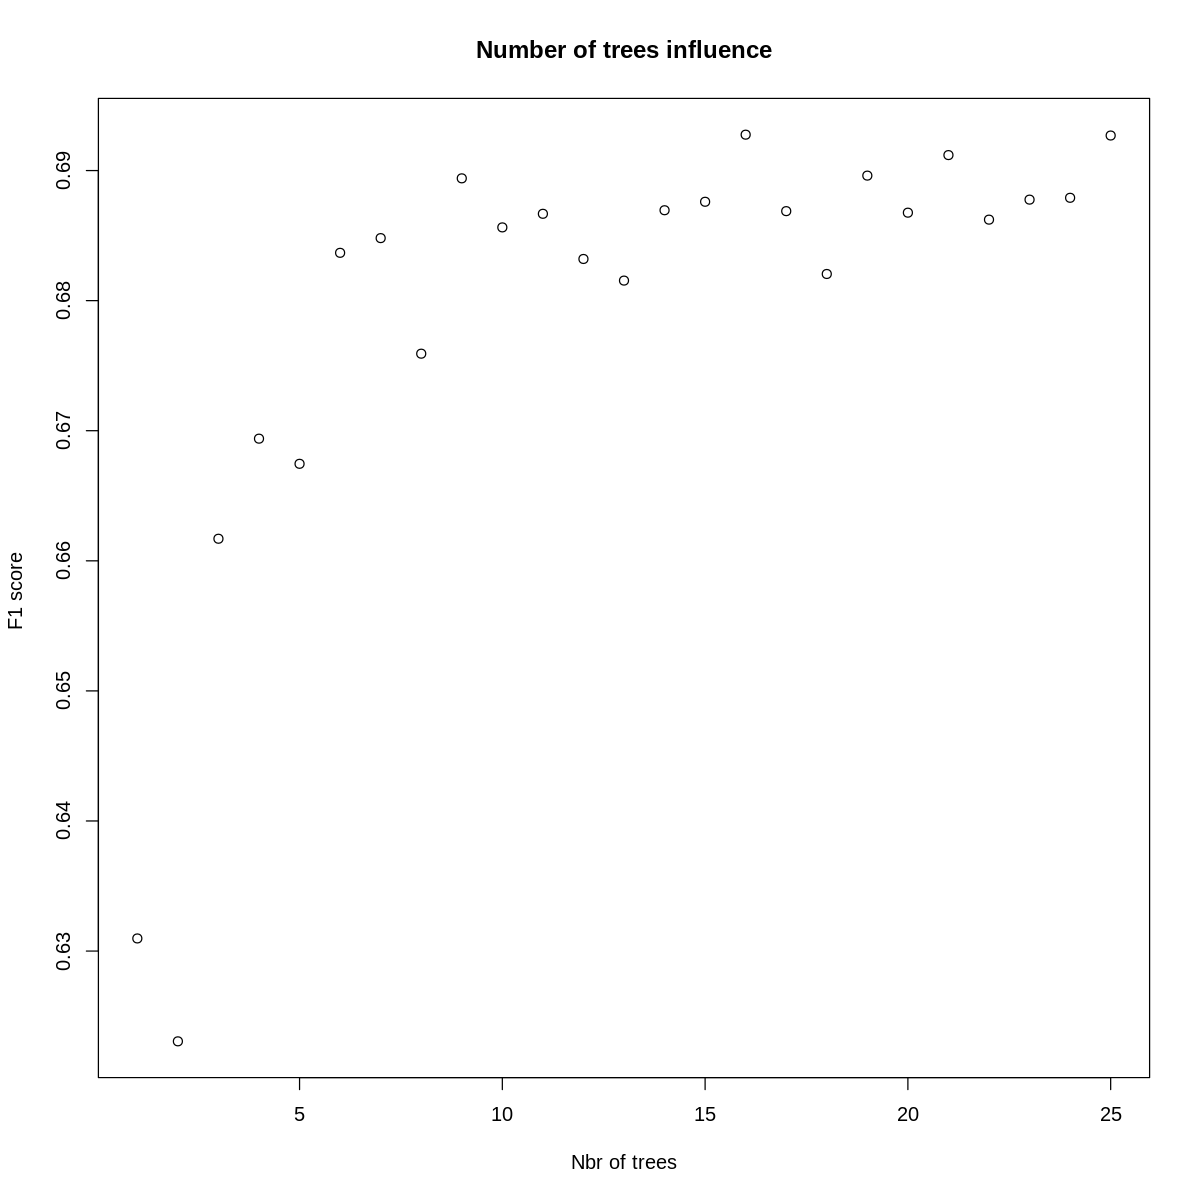

In [222]:
set.seed(123)

n_trees <- 25
F1<- array(0,n_trees)

for (i in 1:n_trees){ 
    #3.1 Take the first half of the dataset as a training data set
    ind <- sample(2, nrow(data), replace = TRUE, prob = c(0.7, 0.3))
    train <- data[ind==1,]
    test <- data[ind==2,]
    
    
    rf_model <- randomForest(x=train[,-c(target_variable)],
                          y=as.factor(train[,c(target_variable)]),
                          
                          ntree=i)
   
    pred <- predict(rf_model,newdata = as.matrix(test[, -ncol(test)]))
    
    Y <- test[,target_variable]
    F1[i]=F1_Score_micro(pred, Y)
    print(paste("[INFO] - F1_score_micro -",i,"tree:",F1[i]))
    }

plot(F1,main = "Number of trees influence",xlab = "Nbr of trees",ylab = "F1 score ")  

F1 score is indeed increasing when have more number of tree in the RF which improved the prediction

In [223]:
# Save the model
saveRDS(rf_model, "RF_model.rds")


**Run this if you want to load the model without running it!**

In [ ]:
# Load the saved model
rf_loaded_model <- readRDS("RF_model.rds")

##3.Neural Network

A neural arrange for multiclassification may be a machine learning show that`s outlined to classify input information into different classes or categories.
The neural organize engineering we depicted comprises of three layers with diverse numbers of neurons: 32, 16, and 8.
Each neuron within the neural network receives input values and performs a computation to deliver an yield.
The yield of the ultimate layer speaks to the anticipated lesson for the input information.
The number of neurons in this layer depends on the dimensionality of the input information.
Each neuron takes the input from the past layer and performs a computation utilizing weights and predispositions.
Covered up Layer 2: This layer comprises of 16 neurons.
Comparative to the past layer, each neuron takes input from the past layer and performs computations utilizing weights and inclinations.
Once more, each neuron gets input from the past layer and performs computations.
Yield Layer: This layer has three neurons, speaking to the three classes: 1, 2, and 3.
Amid the preparing stage, the neural arrange alters the weights and inclinations associated with each neuron to play down the contrast between its anticipated yield and the genuine course names.

---

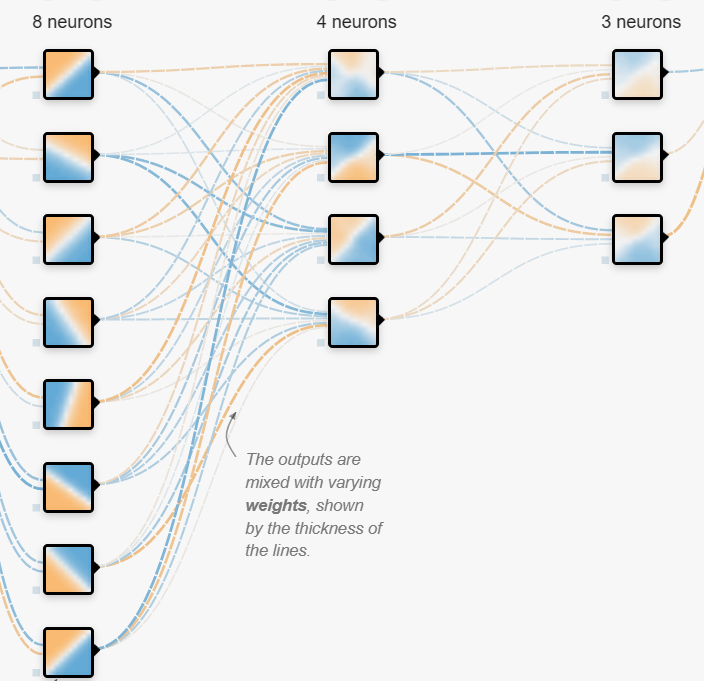

In [82]:
#installing 
install.packages("keras")
library(keras)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [171]:
data<-new_data
dim(data)

[1] 260601     32

**We were having better results in neural networks using MRMR with correlation instead of mutual information, Therefore we took the top 20 features from the previous MRMR!**

In [172]:
data <- new_data[, c(10,14,18,17,9,2,5,11,15,7,23,20,3,24,22,13,16,12,6,19,32)]

In [173]:
dim(data)

[1] 260601     21

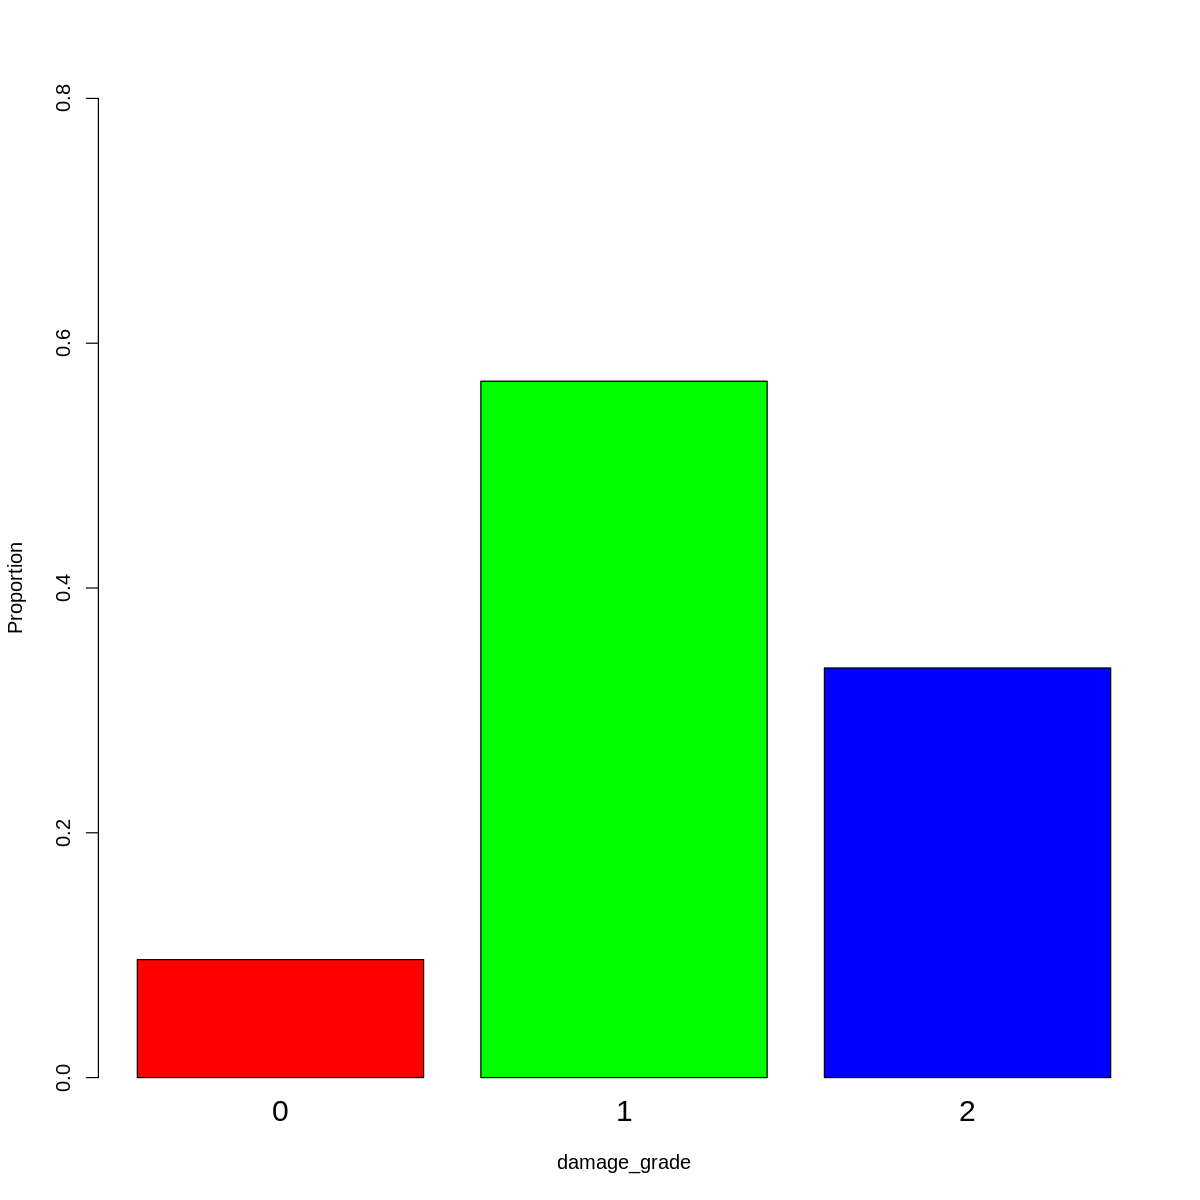

In [174]:
# Partition of the dataset
set.seed(123)
# because softmax activation function is used we have let the damage grade start from 0
data$damage_grade <- data$damage_grade -1
barplot(prop.table(table(data$damage_grade)),
        col = rainbow(3),
        ylim = c(0, 0.8),
        ylab = 'Proportion',
        xlab = 'damage_grade',
        cex.names = 1.5)
data <- as.matrix(data)
dimnames(data) <- NULL 

Normalizing data typically involves transforming the values of a dataset to have a consistent scale, usually between 0 and 1 or with a mean of 0 and a standard deviation of 1. This process is done to ensure that variables with different units or scales are on a comparable level, which can be beneficial for certain analysis or modeling tasks.

In [175]:
data[,1:20] <- normalize(data[,1:20])

In [176]:
#partition the data to 30 % test set and 70% training set
set.seed(1234)
ind <- sample(2, nrow(data), replace = T, prob=c(.8, .2))
training <- data[ind==1, 1:20]
test <- data[ind==2, 1:20]
trainingtarget <- data[ind==1, 21]
testtarget <- data[ind==2, 21]
trainLabels <- to_categorical(trainingtarget)
testLabels <- to_categorical(testtarget)

This code creates a sequential model object using Keras in R. The model consists of three dense layers with progressively decreasing units (32, 16, and 8) and ReLU activation. The output layer has 3 units and uses the softmax activation function. The summary of the model, including layer information and parameter count, is printed.

In [177]:
set.seed(123)
nn_model <- keras_model_sequential()
nn_model %>%  layer_dense(units = 32, activation = 'relu', input_shape = 20) %>% 
  layer_dense(units = 16, activation = 'relu', input_shape = 10) %>%
  layer_dense(units = 8, activation = 'relu', input_shape = 10) %>%    
  layer_dense(units = 3, activation = 'softmax') 
summary(nn_model)

Model: "sequential_7"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_31 (Dense)                   (None, 32)                      672         
 dense_30 (Dense)                   (None, 16)                      528         
 dense_29 (Dense)                   (None, 8)                       136         
 dense_28 (Dense)                   (None, 3)                       27          
Total params: 1,363
Trainable params: 1,363
Non-trainable params: 0
________________________________________________________________________________


In [178]:
set.seed(123)
nn_model %>% compile(loss = 'categorical_crossentropy', 
  optimizer = 'adam',
  metrics = 'accuracy')

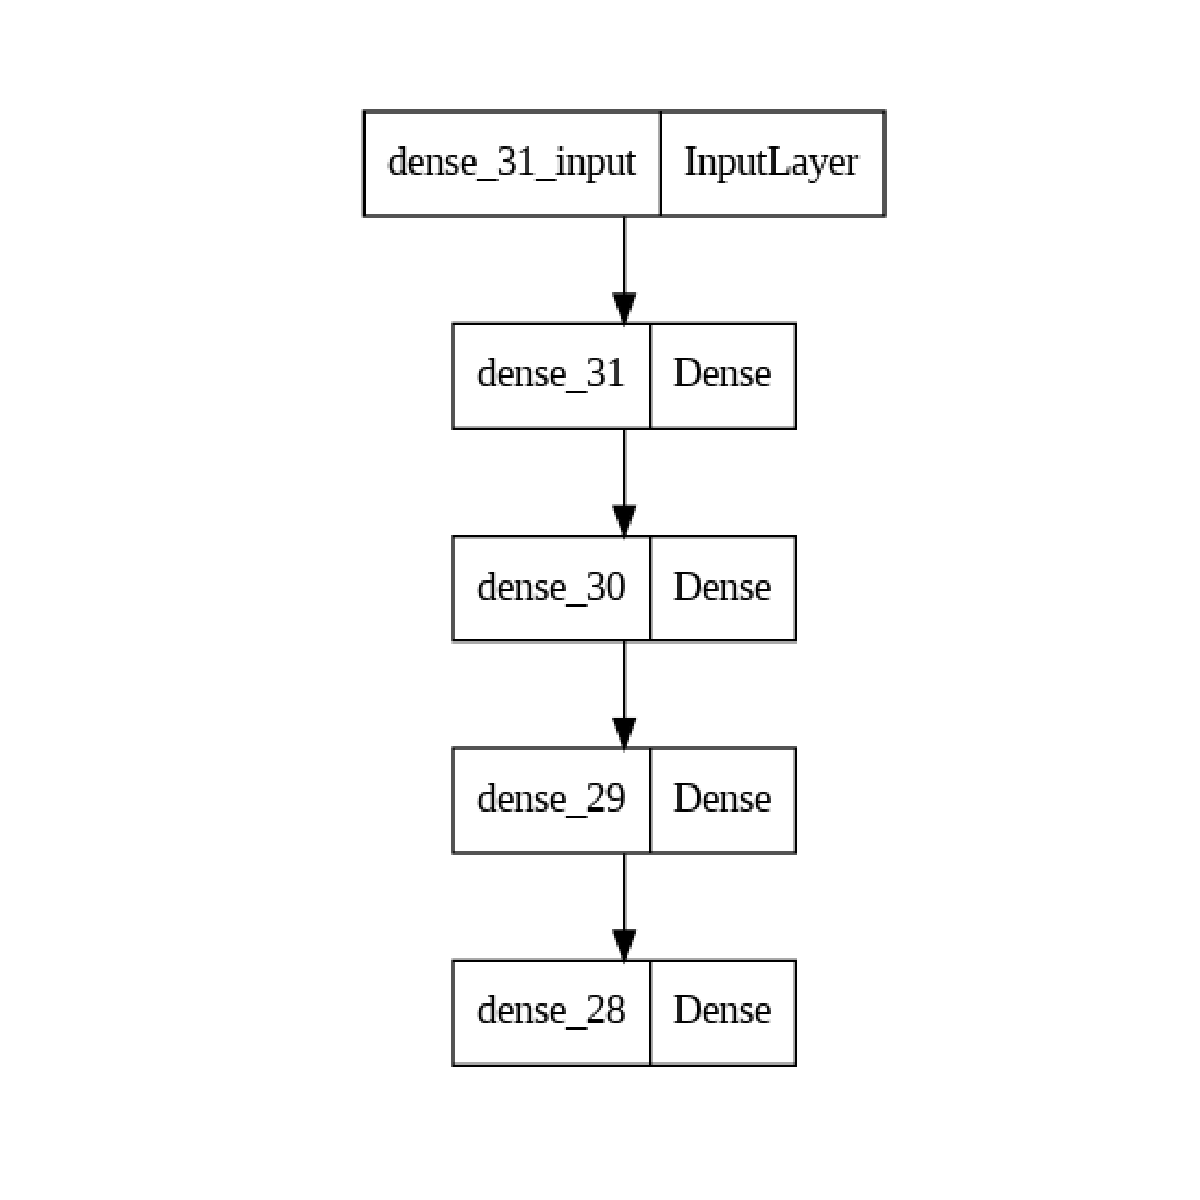

In [179]:
plot(nn_model)


In [180]:
#training the model with 30% validation set
fit <- nn_model %>%   
  fit(training, 
  trainLabels, 
  epochs = 25,
  batch_size = 8, 
  validation_split = 0.2)
  

In [183]:
#save the model
nn_model %>% save_model_hdf5("nn_model.hdf5")

In [168]:
## Load the model
nn_model <- load_model_hdf5("nn_model.hdf5")


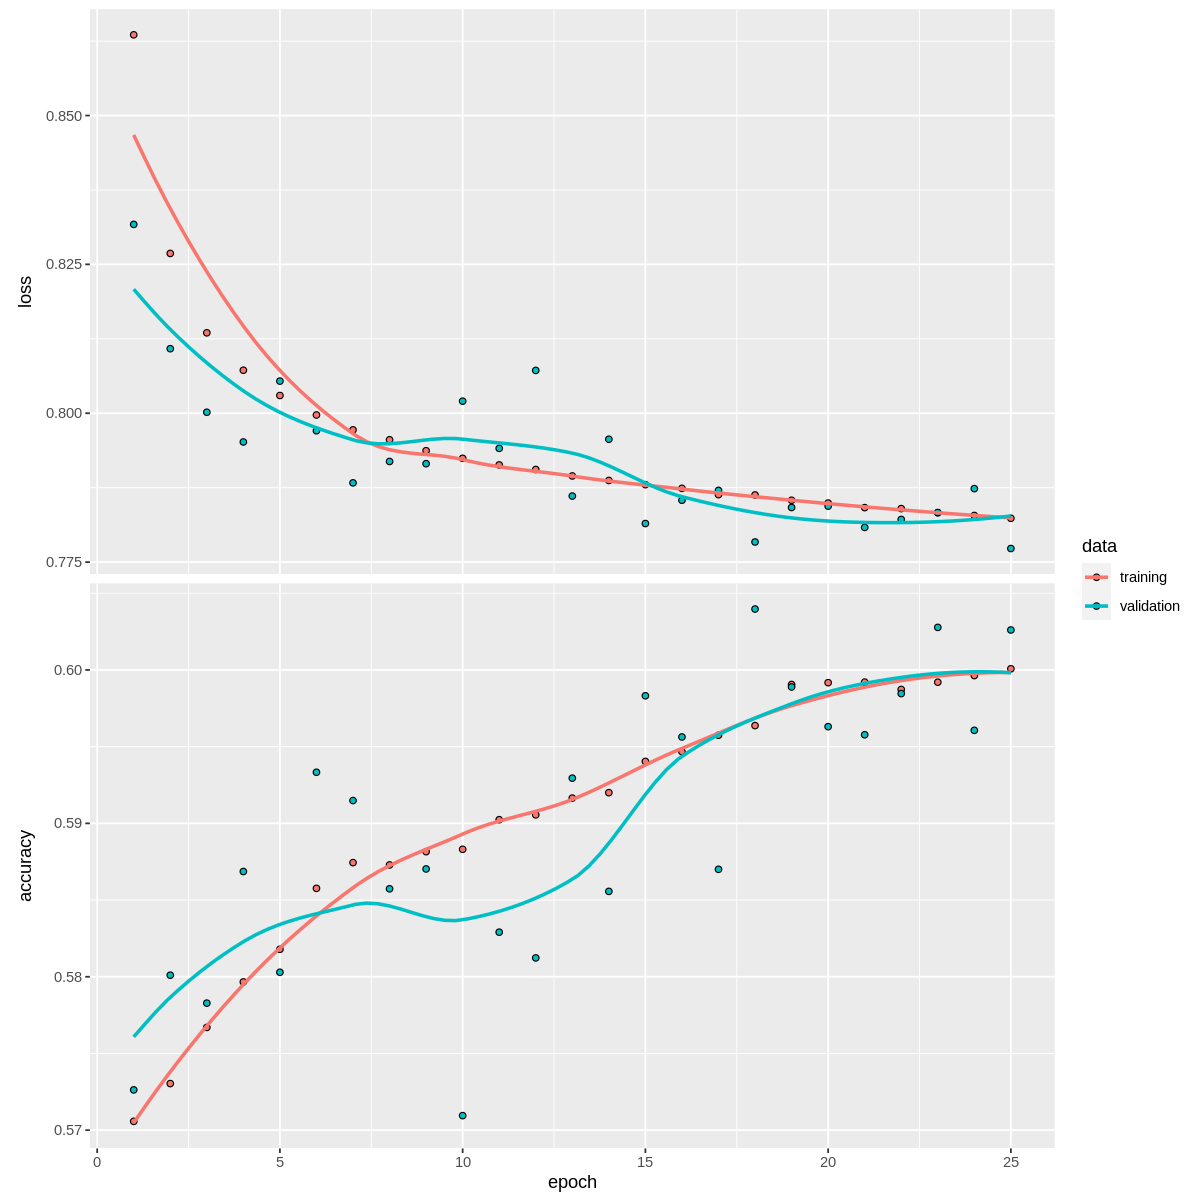

In [182]:
plot(fit)

After training the model we will predict the label from the testing set to calculate the F1 micro score

In [181]:
#predicting the test set
pred <- nn_model%>% 
  predict(as.matrix(test)) %>%
   k_argmax() %>%
   as.integer()
#adding 1 again to the labels
pred<-pred+1
testtarget<-testtarget+1
F1_Score_micro(pred, testtarget)

[1] 0.6080125

NN gave us an F1 micro score of 0.608 which is less accurate than DT and RF but it is seen from the plot how the error is decreasing with more epochs done which is a good sign that the model is working well.

#Task 3: Additional Model


##XGBoost

XGBoost works by training a number of decision trees. Each tree is trained on a subset of the data, and the predictions from each tree are combined to form the final prediction.

---
XGBoost (eXtreme Gradient Boosting) is a general machine learning algorithm that can be effectively applied to multi-classification problems.
When using XGBoost for multiple classification, we use a variant of the algorithm called ‘‘softmax loss‘‘ to model and predict the probability of each class.
Here is an overview of how the XGBoost algorithm works with multiple classifications.
Additionally, you should encode the target variable as a series of integers representing different classes.
Model initialization:Initialize the XGBoost classifier for multiple classification.
Optionally, you can specify the number of classes (3 in our case) to make the algorithm expect the correct number of classes in the target variable.
This algorithm builds an ensemble of decision trees.
During training, XGBoost applies gradient boosting to train each subsequent tree and correct errors in the previous tree.
forecast: Once the XGBoost classifier is trained, it can be used to make predictions for new, unseen instances.
This algorithm computes probabilities for each class using an ensemble of trained decision trees.
evaluation: Evaluate the performance of the XGBoost classifier using a suitable multi-classification metric(F1_score).
These metrics evaluate how well the model can classify instances across all classes.
XGBoost provides additional functionality for multiple classification tasks, including the ability to determine class probabilities using the Predict_proba() method.

---




In [132]:
install.packages("xgboost")
library(xgboost)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [138]:
data<-final_data

In [139]:
#partition the data to 30 % test set and 70% training set
set.seed(123)
ind <- sample(2, nrow(data), replace = TRUE, prob = c(0.7, 0.3))
train <- data[ind==1,]
test <- data[ind==2,]
target_variable <- ncol(data)

In [140]:
X <- train[, -ncol(train)]  
y <- train[,ncol(train)]   
y <- as.factor(y)

In [142]:
# Set parameters
params <- list(
  objective = "multi:softmax",  # Multiclass classification objective
  num_class = 3,                # Number of classes
  eval_metric = "merror"        # Metric for evaluation (multiclass error rate)
)

# Train the model
xgb_model <- xgboost(
  data = as.matrix(X),
  label = as.integer(y) - 1,  # XGBoost expects class labels to start from 0
  params = params,
  eta = 0.1,
  max_depth = 15, 
  nrounds = 500,              # Number of boosting rounds
  verbose = 0                 # Verbosity level (0: silent, 1: print evaluation metrics)
)

After training the model we will predict the label from the testing set to calculate the F1 micro score

In [143]:
pred <- predict(xgb_model,newdata = as.matrix(test[, -ncol(test)]))
pred<-pred+1
Y <- test[,target_variable]
F1=F1_Score_micro(pred, Y)
F1

[1] 0.7294438

Finally it seen that the best model which gave the best result of 0.72 F1 score is the XGboost model thanks to its regularization techniques, efficient gradient-based optimization and flexibility in terms of objective functions.

In [152]:

# Save the model
saveRDS(xgb_model, "xgb_model.rds")


In [153]:
# Load the model
xgb_model <- readRDS("xgb_model.rds")


# Task 4: DrivenData competition submission

We will use the best model which is XGboost to submit our test values prediction to the compitition.

In [251]:
# reading the test values and submission format files
test_values<-read.table("test_values.csv",sep=',',header=T)
sub_format<-read.table("submission_format.csv",sep=',',header=T)

#removing character_variables form test
test_data<-test_values[,-character_variables]
dim(test_values)

#choosing the top 20 features
test_data <- test_data[,c(top_20_features_names)]
pred <- predict(xgb_model,newdata = as.matrix(test_data))
# Create the data vectors
building_id <- test_values[, 1]
damage_grade <- pred+1

#create dataframe for the new sub file
submission_XGB<- data.frame(building_id = building_id, damage_grade = damage_grade)
file_path <- "submission_XGB.csv"

#save the submission result
write.csv(submission_XGB, file = file_path, row.names = FALSE)

[1] 86868    39

#Task 5:  Ranking of the features in terms of relevance

By utilizing this function compute_entropy, you can evaluate the entropy of a discrete variable y and gain insights into the amount of information contained in its distribution. Higher entropy values indicate greater uncertainty or diversity among the variable's values, while lower entropy values suggest more concentrated or predictable distributions.

---



In [236]:
data<-final_data

In [237]:
compute_entropy <- function(y) {
  #calculates the probabilities of each unique value in the variable y 
  # by using table to count the frequency of each value
  probabilities <- prop.table(table(y))

  #the formula of entropy
  entropy <- -sum(probabilities*log2(probabilities))
  
  return(entropy)
}

In [238]:
X <- data[, -ncol(data)]  
y <- data[,ncol(data)]  
y=as.integer(y)
#comouting the entropy
H_y_X <- compute_entropy(y)

 It computes the relevance of the feature by subtracting the entropy (H_y_X_i) of the predicted values from xgb_model_i from the initial entropy (H_y_X).

---



In [248]:
compute_relevance <- function(data, y, feature_index, H_y_X) {
  
  X_i <- data[, -feature_index] #take all features without the i-th one
  
  xgb_model_i <- xgboost(data = as.matrix(X_i), label = y,nrounds = 10,verbose= F ) #fit the xg_boost model
  
  H_y_X_i <- compute_entropy(predict(xgb_model_i, newdata = as.matrix(X_i))) #predict the y for X_i dataset and compute entropy using the function we defined before
  
  relevance <- H_y_X_i - H_y_X # compute the difference between the entropy H_y_x_i and H_y_X
  
  return(relevance)
}

The code calculates the relevance of each feature in predicting the target variable based on the given dataset X, target variable y, and initial entropy H_y_X.

---



In [250]:
relevance <- sapply(1:ncol(X), function(i) compute_relevance(X, y, i, H_y_X))
feature_ranking <- order(-relevance)
print(feature_ranking)

 [1] 10  4 15  8  3  5  1 20 11 17 18 19  6  7  9  2 13 14 12 16


In [243]:
# top ranked features
ranked_features_names<-colnames(X)[feature_ranking]
ranked_features_names

[1] "has_superstructure_cement_mortar_stone"
 [2] "has_superstructure_rc_non_engineered"  
 [3] "geo_level_3_id"                        
 [4] "has_superstructure_bamboo"             
 [5] "has_superstructure_rc_engineered"      
 [6] "has_superstructure_stone_flag"         
 [7] "has_superstructure_mud_mortar_stone"   
 [8] "has_secondary_use_rental"              
 [9] "building_id"                           
[10] "has_secondary_use_use_police"          
[11] "has_secondary_use_gov_office"          
[12] "has_secondary_use_health_post"         
[13] "has_superstructure_cement_mortar_brick"
[14] "count_families"                        
[15] "has_secondary_use"                     
[16] "count_floors_pre_eq"                   
[17] "geo_level_1_id"                        
[18] "age"                                   
[19] "geo_level_2_id"                        
[20] "area_percentage"

so these are the top features relevant to the target in the means of entropy and they are little similar to MRMR.

# Conclusion 

To conclude the earthquake data we studied was interesting to explore and select a model for it. Using decision trees , random forests, neural networks and Xgboost were not a bad choice in terms of predicting the damage grade on our data. We also tried to use support vector machines but its training was taking too long and didn't give good result F1 score of 0.55. In addition, for feature ranking MRMR really gave good relevant features but using mutual inforamtion gave different results from using correlation so we used different features in  NN other than in the other models. Finally XGBoost gave the best F1 micro score of 0.73 and our Driven data submission result was 0.72 with ranking of  1261!!